#Angular deviation of VGPs from north through secular variation

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Distance from the Slate Islands to the 438 Ma Rose Hill pole can be calculated (colatitude) and used to determine the paleolatitude of the Slate Islands as constrained by the Rose Hill pole.

In [2]:
Rose_Hill_Plat = -19.1 
Rose_Hill_Plong = 308.3
Rose_Hill = (Rose_Hill_Plong, Rose_Hill_Plat)

Slate_Lat = 48.6
Slate_Long = -87.0
Slate = (Slate_Long, Slate_Lat)

plat = 90 - pmag.angle(Rose_Hill, Slate)
print plat[0]

15.3407768768


The statistical secular variation model TK03 can be used to simulate secular variation with random draws being taken from the model. The function is set up to return directions so they are then recalculated as poles (this is silly as poles good be calculated directly and should be fixed in the future).

In [4]:
VGPs = ipmag.tk03(n=100,lat=0) #set at 100,000 this takes a long time to run
VGP_dataframe = pd.DataFrame(VGPs,columns=['dec_tc','inc_tc','int'])
VGP_dataframe['site_lat'] = pd.Series(np.random.uniform(0,0,size=len(VGPs)))
VGP_dataframe['site_lon'] = pd.Series(np.random.uniform(0,0,size=len(VGPs)))
  
ipmag.vgp_calc(VGP_dataframe)    

VGP_dataframe.head()

,dec_tc,inc_tc,int,site_lat,site_lon,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,359.102545,-7.360665,20383.249784,0,0,-3.695581,86.197156,193.631023,-86.197156,13.631023
1,358.867437,-5.725660,20373.790827,0,0,-2.869995,86.914794,201.517640,-86.914794,21.517640
2,7.467135,12.971863,9841.611086,0,0,6.570120,80.066234,48.450864,-80.066234,228.450864
3,2.778490,20.451887,23462.081616,0,0,10.562298,79.082377,14.572539,-79.082377,194.572539
4,2.904132,5.199814,24295.287034,0,0,2.605271,86.099281,48.073168,-86.099281,228.073168


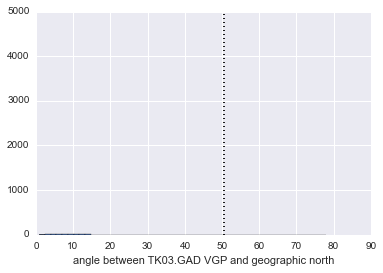

In [5]:
greater_10 = []
greater_20 = []
greater_30 = []
greater_40 = []
greater_50 = []
angles = []
for n in range(len(VGP_dataframe)):
    true_north = (0,90)
    vgp = (VGP_dataframe['vgp_lon'][n],VGP_dataframe['vgp_lat'][n])
    angle = pmag.angle(true_north,vgp)
    angles.append(angle[0])
    if angle > 10:
        greater_10.append(angle[0])
    if angle > 20:
        greater_20.append(angle[0])
    if angle > 30:
        greater_30.append(angle[0])
    if angle > 40:
        greater_40.append(angle[0])
    if angle > 50:
        greater_50.append(angle[0])
    
plt.hist(angles, bins=50)
plt.xlim(0,90)
plt.vlines(50.6,0,5000,linestyles='dotted')
plt.xlabel('angle between TK03.GAD VGP and geographic north')
plt.savefig('SV_histogram.pdf')
plt.show()

In [6]:
print "Percent of VGPS with angular difference from mean greater than 10º"
print float(len(greater_10))/float(len(angles))*100.0
print "Percent of VGPS with angular difference from mean greater than 20º"
print float(len(greater_20))/float(len(angles))*100.0
print "Percent of VGPS with angular difference from mean greater than 30º"
print float(len(greater_30))/float(len(angles))*100.0
print "Percent of VGPS with angular difference from mean greater than 40º"
print float(len(greater_40))/float(len(angles))*100.0
print "Percent of VGPS with angular difference from mean greater than 50º"
print float(len(greater_50))/float(len(angles))*100.0

Percent of VGPS with angular difference from mean greater than 10º
41.0
Percent of VGPS with angular difference from mean greater than 20º
6.0
Percent of VGPS with angular difference from mean greater than 30º
3.0
Percent of VGPS with angular difference from mean greater than 40º
2.0
Percent of VGPS with angular difference from mean greater than 50º
2.0


In [8]:
gauss = pmag.mktk03(8,1,0,0)
pmag.getvec(gauss,0,0)

array([  3.51470897e+02,  -2.85142561e+00,   2.37672147e+04])